In [103]:
from PIL import Image, ImageDraw
import numpy as np
from matplotlib import pyplot as plt
import cv2

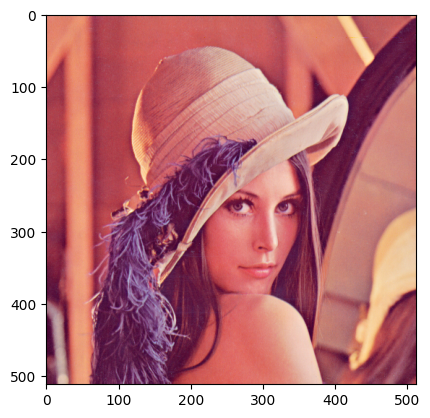

In [104]:
# 画像を読み込む
img = cv2.imread('imgs/lena.png', )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

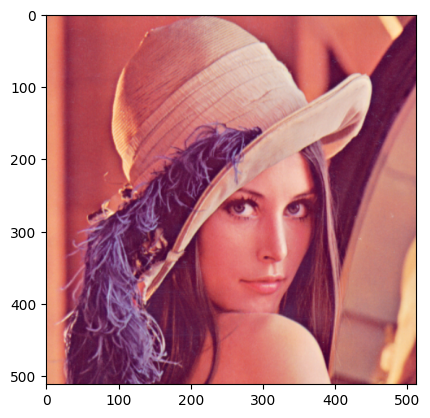

In [105]:
scaled_img=cv2.resize(img, (int(img.shape[0]*1.2), int(img.shape[1]*1.2)))
x = scaled_img.shape[1]/2 - img.shape[1]/2
y = scaled_img.shape[0]/2 - img.shape[0]/2
scaled_img = scaled_img[int(y):int(y+img.shape[1]), int(x):int(x+img.shape[0])]
plt.imshow(cv2.cvtColor(scaled_img, cv2.COLOR_BGR2RGB))

In [128]:
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 150,
                       qualityLevel = 0.1,
                       minDistance = 5,
                       blockSize = 9 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
scaled_gray_img=cv2.cvtColor(scaled_img, cv2.COLOR_BGR2GRAY)

In [129]:
#初めのフレームから特徴点を検出
p0 = cv2.goodFeaturesToTrack(gray_img, mask = None, **feature_params)
#両フレームからオプティカルフロー計算
p1, st, err = cv2.calcOpticalFlowPyrLK(gray_img,scaled_gray_img, p0, None, **lk_params)

# Select good points
good_new = p1[st==1]
good_old = p0[st==1]

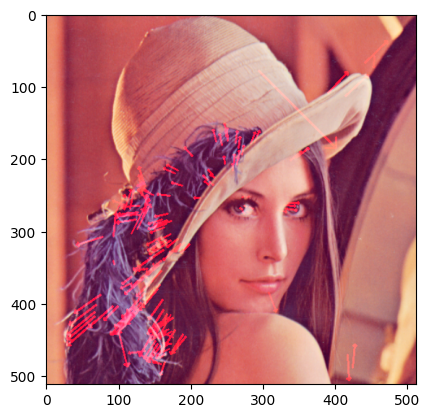

In [130]:
# draw the tracks
mask  = np.zeros_like(img) #create mask image
frame = scaled_img
for i,(new,old) in enumerate(zip(good_new,good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    mask = cv2.arrowedLine(mask, (int(c),int(d)), (int(a),int(b)), [0, 0,255], 2)
    #frame = cv2.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
result = cv2.add(frame,mask)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))